<font color=8988AB size=4>
Name:  فاطمه غزاله فتحی
<br>
<font color=8988AB size=4>
Student Number: 402106059 / 402106083/ 402106242

### 📓 first-order Markov Chain Weather Sentence Generator

This notebook builds a **first-order Markov model** to generate new weather-related sentences based on a corpus of existing ones.



###  What is a Markov Model?
A **Markov model** is a probabilistic model for a sequence of random variables. In the first-order Markov model we assume the **future state depends only on the current state** and not on the sequence of events that preceded it.

We use this idea to model how words follow one another in the weather report corpus. Once the model is built, we can generate new sentences by starting from a known starting word and repeatedly sampling the next word based on learned probabilities.


## Step 0: Imporatant libraries
Import necessary libraries here. You can use different libraries, but you should implement the Markov chain yourself and you can not use ready libraries.

In [52]:

!pip install networkx



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
from collections import defaultdict
from collections import Counter
import random
import networkx as nx
import matplotlib.pyplot as plt


## Step 1: Load the corpus file
Load the input sentences from weahther_corpus.txt and print its few first lines.

In [54]:
# Load the corpus
#ToDo
# Load the some line from a file
with open('weather_corpus.txt', 'r') as file:
    corpus = file.readlines()

corpus = [line.strip() for line in corpus]

# Print lines 1 to 25 
print("Lines 1 to 25 from corpus:")
for line in corpus[0:25]:
    print(line)


Lines 1 to 25 from corpus:
Tomorrow Los-Angeles's sunny.
Today Mashhad's windy.
Grab a jacket, black clouds over Toronto.
Tomorrow Mashhad's sunny.
Tomorrow Istanbul's weather is cloudy.
Today Berlin's snowy.
Grab an umbrella, dark clouds over Berlin.
Grab an umbrella, dark clouds over London.
Tomorrow London's rainy.
Today Istanbul's weather is cloudy.
Tomorrow Mashhad's sunny.
Grab an umbrella, black clouds over Tehran.
Tomorrow Los-Angeles's sunny.
Grab a jacket, black clouds over London.
Tomorrow Mashhad's windy.
Today Rome's sunny.
Tomorrow Tehran's sunny.
Tomorrow Berlin's cloudy.
Grab a jacket, thunderstorms expected in Montreal.
Grab a coat, thunderstorms expected in Montreal.
Tomorrow London's cloudy.
Today Los-Angeles's rainy.
Grab a coat, thunderstorms expected in Montreal.
Today Toronto's cloudy.
Grab an umbrella, dark clouds over Berlin.


## Step 2: Tokenize the corpus
This step splits the corpus into individual tokens (words and punctuation).

In [57]:
# Tokenize the file

#ToDo
import re
tokenized_corpus = []
# This Function to tokenize into words and punctuation
def tokenize_sentence(sentence):
    # Regex
    return re.findall(r"\b\w+(?:'\w+)?\b|[^\w\s]", sentence)
    # return tokens

# use tokenizer
for sentence in corpus:
    tokens = tokenize_sentence(sentence)
    tokenized_corpus.append(tokens)
    
# Print the first few tokenized sentences to verify
print("tokenized all sentences:")
for tokens in tokenized_corpus[:101]:
    print(tokens)


tokenized all sentences:
['Tomorrow', 'Los', '-', "Angeles's", 'sunny', '.']
['Today', "Mashhad's", 'windy', '.']
['Grab', 'a', 'jacket', ',', 'black', 'clouds', 'over', 'Toronto', '.']
['Tomorrow', "Mashhad's", 'sunny', '.']
['Tomorrow', "Istanbul's", 'weather', 'is', 'cloudy', '.']
['Today', "Berlin's", 'snowy', '.']
['Grab', 'an', 'umbrella', ',', 'dark', 'clouds', 'over', 'Berlin', '.']
['Grab', 'an', 'umbrella', ',', 'dark', 'clouds', 'over', 'London', '.']
['Tomorrow', "London's", 'rainy', '.']
['Today', "Istanbul's", 'weather', 'is', 'cloudy', '.']
['Tomorrow', "Mashhad's", 'sunny', '.']
['Grab', 'an', 'umbrella', ',', 'black', 'clouds', 'over', 'Tehran', '.']
['Tomorrow', 'Los', '-', "Angeles's", 'sunny', '.']
['Grab', 'a', 'jacket', ',', 'black', 'clouds', 'over', 'London', '.']
['Tomorrow', "Mashhad's", 'windy', '.']
['Today', "Rome's", 'sunny', '.']
['Tomorrow', "Tehran's", 'sunny', '.']
['Tomorrow', "Berlin's", 'cloudy', '.']
['Grab', 'a', 'jacket', ',', 'thunderstorms', 'e

## Step 3: Build the Markov chain
Here we count the transitions from one word to the next across the whole corpus.

In [58]:

markov_chain = defaultdict(lambda: defaultdict(int))

# Loop through each tokenized sentence
for sentence in tokenized_corpus:
    for i in range(len(sentence)):
        current_word = sentence[i]
        
        # If not the last word, get the next word
        if i < len(sentence) - 1:
            next_word = sentence[i + 1]
        else:
            next_word = 'END'  # Mark end of sentence
        
        # Increase count
        markov_chain[current_word][next_word] += 1

# Print 
print("Markov chain built. Markov chain:")
for curr_word, next_words in markov_chain.items():
    print(f"{curr_word}: defaultdict(<class 'int'>, {dict(next_words)})")



Markov chain built. Markov chain:
Tomorrow: defaultdict(<class 'int'>, {'Los': 4, "Mashhad's": 11, "Istanbul's": 10, "London's": 3, "Tehran's": 5, "Berlin's": 5, "Rome's": 4})
Los: defaultdict(<class 'int'>, {'-': 9})
-: defaultdict(<class 'int'>, {"Angeles's": 9})
Angeles's: defaultdict(<class 'int'>, {'sunny': 5, 'rainy': 3, 'cloudy': 1})
sunny: defaultdict(<class 'int'>, {'.': 21})
.: defaultdict(<class 'int'>, {'END': 100})
Today: defaultdict(<class 'int'>, {"Mashhad's": 4, "Berlin's": 5, "Istanbul's": 2, "Rome's": 3, 'Los': 5, "Toronto's": 4, "Tehran's": 3, "London's": 2})
Mashhad's: defaultdict(<class 'int'>, {'windy': 5, 'sunny': 4, 'weather': 2, 'hot': 4})
windy: defaultdict(<class 'int'>, {'.': 7})
Grab: defaultdict(<class 'int'>, {'a': 18, 'an': 12})
a: defaultdict(<class 'int'>, {'jacket': 10, 'coat': 8})
jacket: defaultdict(<class 'int'>, {',': 10})
,: defaultdict(<class 'int'>, {'black': 11, 'dark': 7, 'thunderstorms': 12})
black: defaultdict(<class 'int'>, {'clouds': 11})

# Step 4: Normalize the transitions into probabilities
Each transition is turned into a probability based on how frequently it occurs.

In [59]:
# ToDo: Normalize transitions to probabilities

# Create a new dictionary for proobs
probabilities = defaultdict(dict)

# each word
for current_word, transitions in markov_chain.items():
    total = sum(transitions.values())  # Total transitions from current_word
    for next_word, count in transitions.items():
        probabilities[current_word][next_word] = count / total  # Normalize

# Sample for selected words
selected_words = ["Tomorrow", "Grab", "Today", "clouds", "Mashhad's"]
print("Sample transition probabilities for selected words:")
for word in selected_words:
    if word in probabilities:
        print(f"'{word}' -> {probabilities[word]}")
    else:
        print(f"'{word}' not found in model.")


Sample transition probabilities for selected words:
'Tomorrow' -> {'Los': 0.09523809523809523, "Mashhad's": 0.2619047619047619, "Istanbul's": 0.23809523809523808, "London's": 0.07142857142857142, "Tehran's": 0.11904761904761904, "Berlin's": 0.11904761904761904, "Rome's": 0.09523809523809523}
'Grab' -> {'a': 0.6, 'an': 0.4}
'Today' -> {"Mashhad's": 0.14285714285714285, "Berlin's": 0.17857142857142858, "Istanbul's": 0.07142857142857142, "Rome's": 0.10714285714285714, 'Los': 0.17857142857142858, "Toronto's": 0.14285714285714285, "Tehran's": 0.10714285714285714, "London's": 0.07142857142857142}
'clouds' -> {'over': 1.0}
'Mashhad's' -> {'windy': 0.3333333333333333, 'sunny': 0.26666666666666666, 'weather': 0.13333333333333333, 'hot': 0.26666666666666666}


## Step 5: Collect possible sentence start words
We find which words are most likely to start a sentence based on the corpus.

### ToDo: Find and display starting words from the corpus
start_word_counts = Counter()

for sentence in tokenized_corpus:
    if sentence:  
        start_word_counts[sentence[0]] += 1

# Display the most words in starts
print("Most common sentence starting words:")
for word, count in start_word_counts.most_common():
    print(f"{word}: {count} times")



## Step 6: Define a function to generate fake weather sentences
The function uses the learned Markov chain to generate sentences starting from a real starting word.

In [61]:
def generate_sentence(chain, start_words, max_length=15):
    current_word = random.choice(start_words)
    sentence = [current_word]
    
    for _ in range(max_length):
        if current_word not in chain:
            break
        next_words = list(chain[current_word].keys())
        next_probs = list(chain[current_word].values())
        current_word = random.choices(next_words, weights=next_probs)[0]
        if current_word == 'END':
            break
        sentence.append(current_word)

    return ' '.join(sentence)


## Step 7: Generate 10 fake sentences
This cell uses the generation function to create and print new fake weather-related sentences.

In [62]:
# ToDo: Generate 10 fake sentences
print("Generated Fake Sentences:\n")

for i in range(1, 11):
    sentence = generate_sentence(probabilities, list(start_word_counts.keys()))
    print(f"{i}. {sentence}")


Generated Fake Sentences:

1. Tomorrow Mashhad's windy .
2. Tomorrow London's weather is cloudy .
3. Grab an umbrella , thunderstorms expected in Montreal .
4. Today Berlin's snowy .
5. Tomorrow Istanbul's weather is cloudy .
6. Today Toronto's snowy .
7. Tomorrow Mashhad's sunny .
8. Tomorrow Rome's stormy .
9. Grab a coat , thunderstorms expected in Toronto .
10. Grab a jacket , dark clouds over London .


# Part 8: Visualize the Complete Markov Chain

Here we visualize the **full first-order Markov model** built from the weather corpus. You can use different libraries.


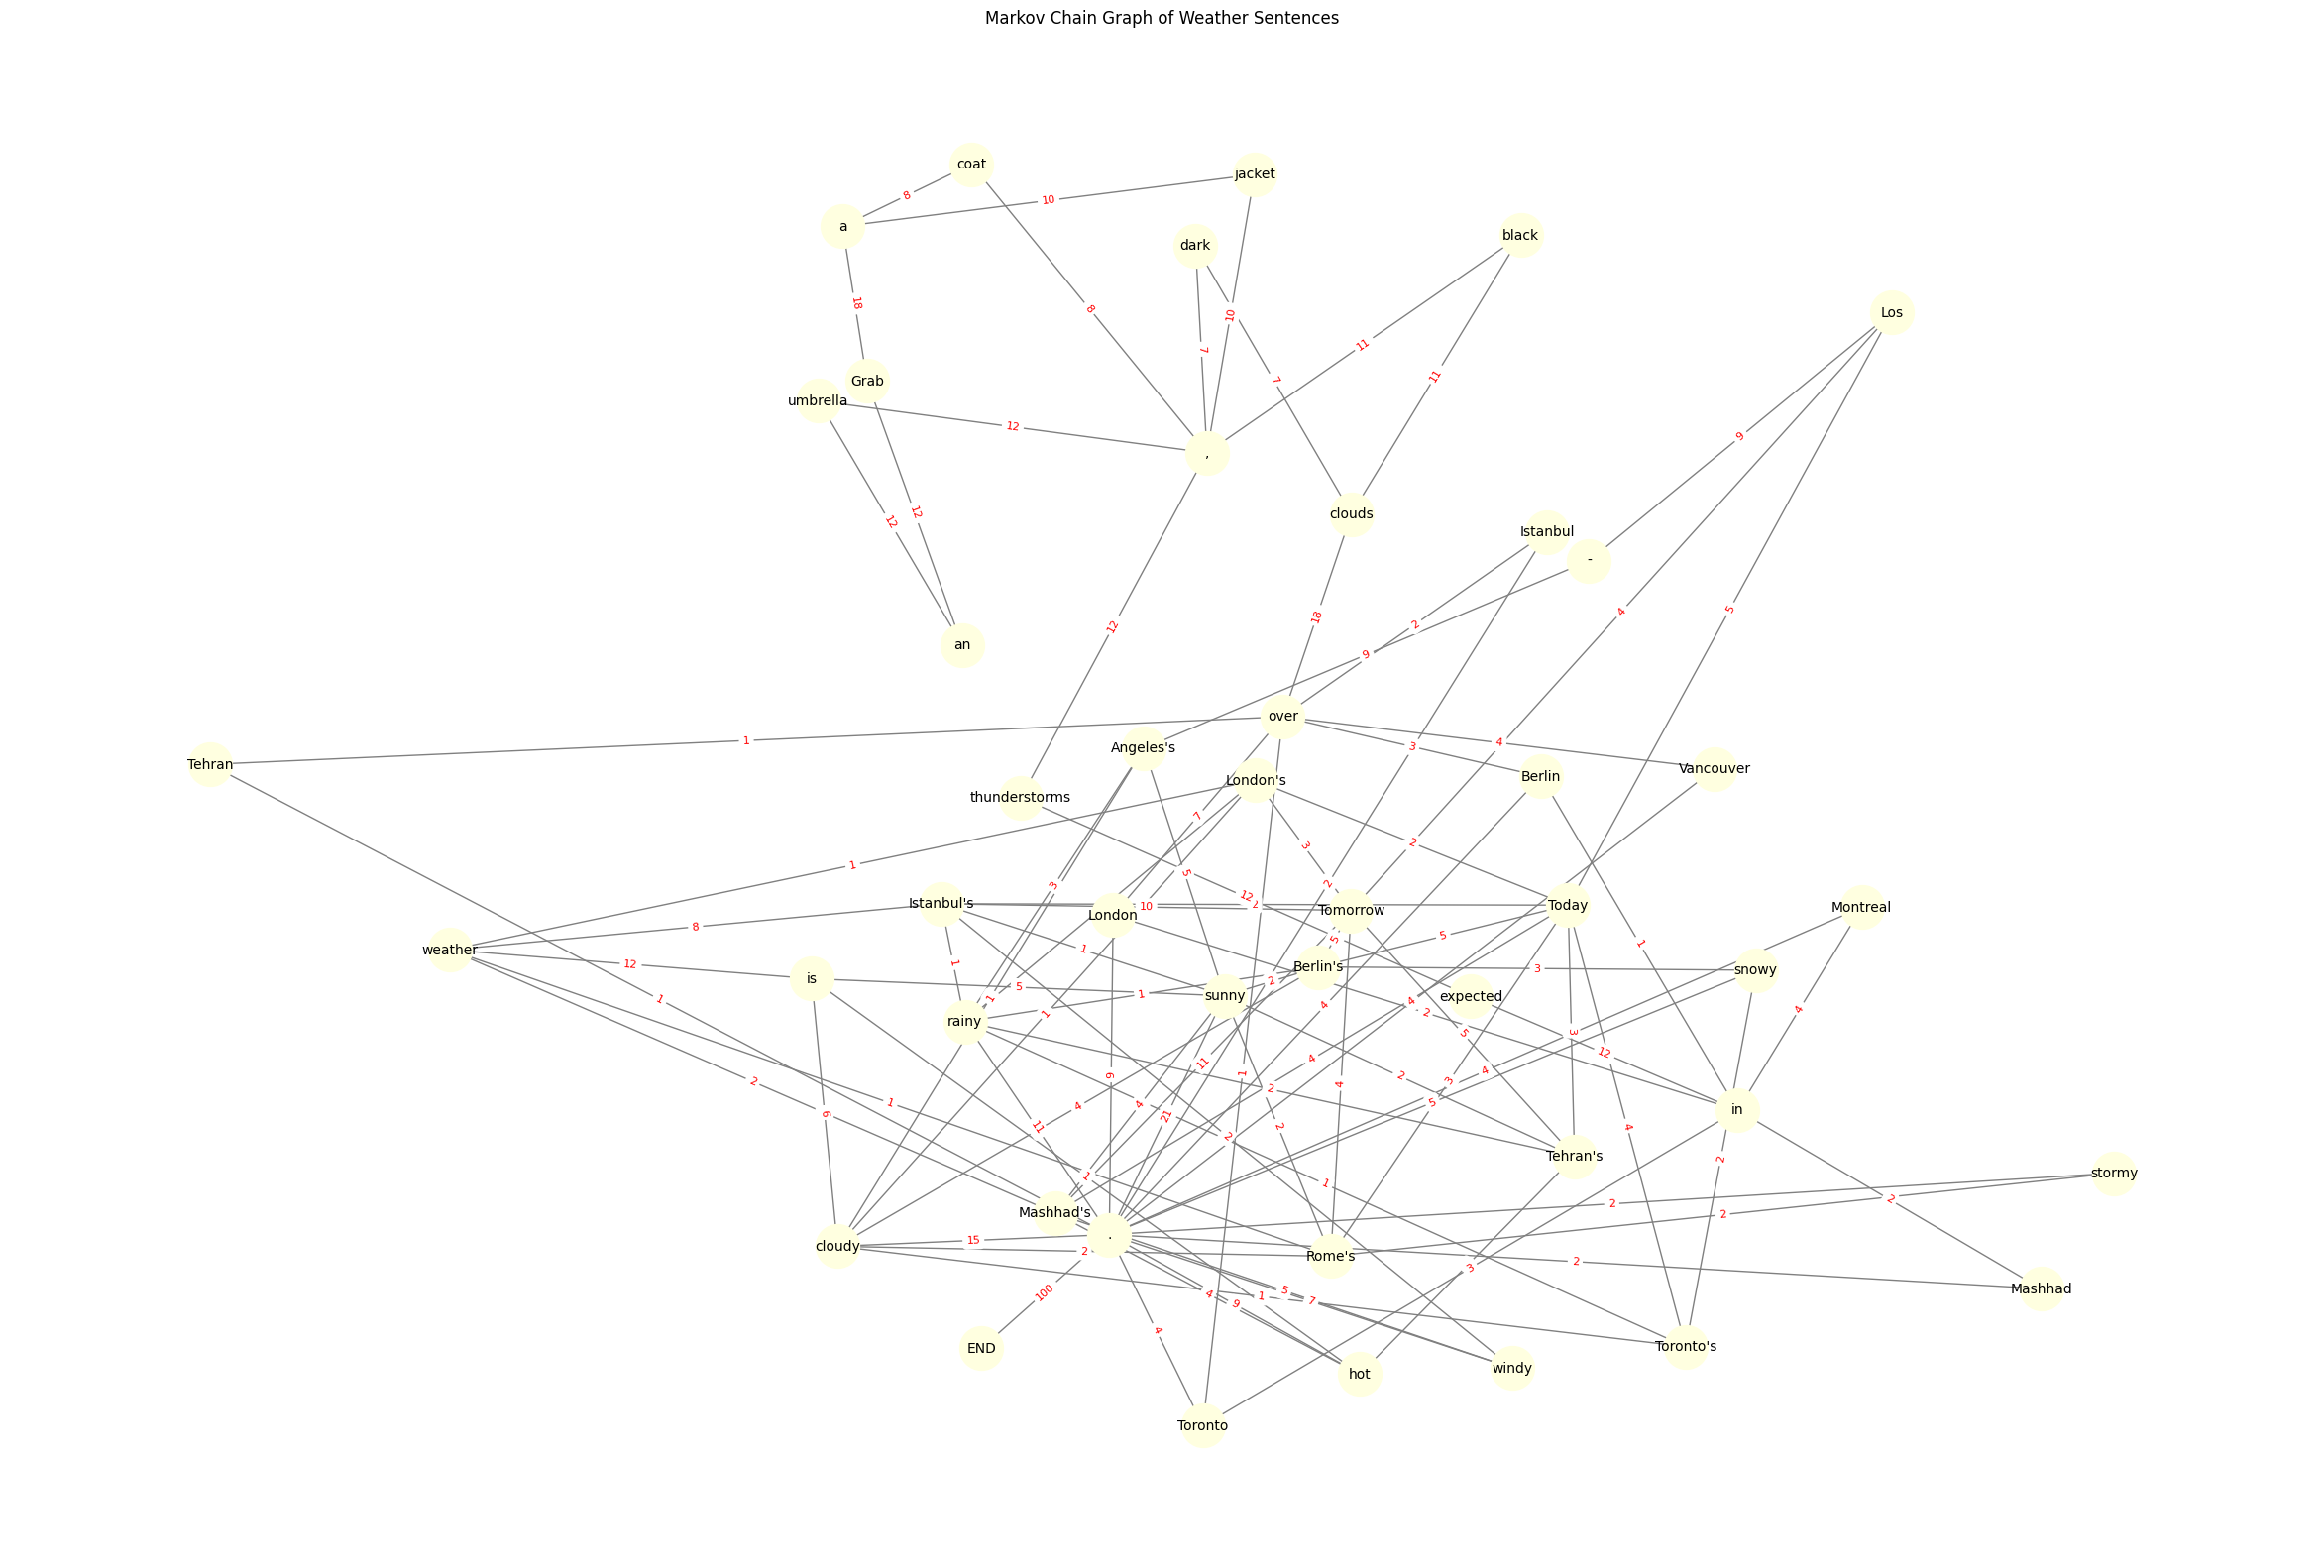

In [63]:
# ToDo: Visualize the full Markov chain
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for current_word, next_words in markov_chain.items():
    for next_word, count in next_words.items():
        G.add_edge(current_word, next_word, weight=count)

# create gra
plt.figure(figsize=(30, 20))
pos = nx.spring_layout(G, k=1.5, iterations=100)

# nodes
nx.draw_networkx_nodes(G, pos, node_color='lightyellow', node_size=1000)

# yal
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10, edge_color='gray')

nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# weight
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')

plt.title("Markov Chain Graph of Weather Sentences")
plt.axis('off')
plt.show()
